In [1]:
#подключение нужных библиотек
import math
import IPython 
import os 
import random
import time
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import nct
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.ticker as tick
from matplotlib import rcParams
from matplotlib.backends.backend_pdf import PdfPages
# настройка графиков
plt.rcParams['axes.facecolor'] = 'lavender' 
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.figsize'] = (25,15)

In [2]:
myDataPath = 'D:\\files\\' # расположение файлов
tickers = ['BANEP','GAZP','LKOH','NVTK','ROSN','SNGS','SNGSP','TATN','TATNP','TRNFP'] # тикеры компаний выбранного индекса

# Предварительный анализ данных

Wall time: 1.66 s


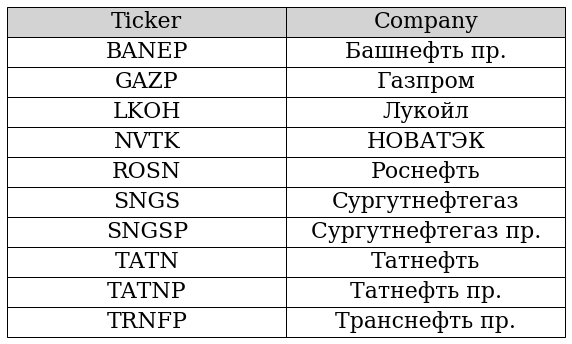

In [10]:
%%time
# считывание csv-файла с тиккерами
df=pd.read_csv(myDataPath+'tickers.txt')
# оформление таблицы
fig,ax = plt.subplots(figsize=(5,1))
ax.axis('tight')
ax.axis('off')
the_table=ax.table(cellText=df.values,colLabels=df.columns,loc='center', cellLoc='center',colColours=['lightgrey', 'lightgrey'])
the_table.auto_set_font_size('best')
the_table.scale(2,2.5)
the_table.set_fontsize(35)
rcParams['font.family']='serif'
rcParams['font.sans-serif']=['Times']
# сохранение файла
pp=PdfPages(myDataPath+'Таблица1.Company.pdf')
pp.savefig(fig,bbox_inches='tight')
pp.close()

Wall time: 5.66 s
Parser   : 222 ms


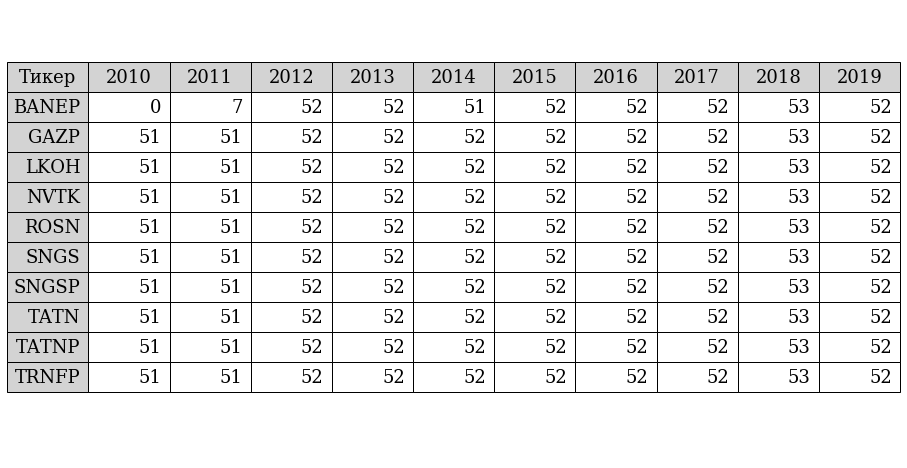

In [11]:
%%time
# функция расчета торговых недель в году
def ndays(year,file): 
    # преобразует файл в дф
    df=pd.read_csv(file) 
    # подсчет торговых недель за данный год
    condition = (df['<DATE>']>=year*10000) & (df['<DATE>']<(year+1)*10000) 
    return len(df[condition])
# создаем дф
dfNDays = pd.DataFrame() 
dfNDays['Тикер'] = tickers # столбец тикеров
# заполнение таблицы
for year in range(2010,2020):
    yearDays = []
    for ticker in tickers:
        yearDays.append(ndays(year,myDataPath+ ticker + '.csv')) # применение функции, определяющей число торговых недель
    dfNDays[str(year)] = yearDays

# оформление таблицы
fig1,ax1 = plt.subplots(figsize=(8,8))
ax1.axis('tight')
ax1.axis('off')
colo = ['white']*10
colo.insert(0,'lightgrey')
cellcolo = [colo]*10
the_table1=ax1.table(cellText=dfNDays.values,colLabels=dfNDays.columns,loc='center',colColours=['lightgrey']*11,cellColours=cellcolo)
the_table1.auto_set_font_size('best')
the_table1.scale(2,2.5)
the_table1.set_fontsize(30)
rcParams['font.family']='serif'
rcParams['font.sans-serif']=['Times']
# сохранение в pdf
pp1=PdfPages(myDataPath+'Таблица2.Weeks.pdf')
pp1.savefig(fig1,bbox_inches='tight')
pp1.close()

In [55]:
# обновление списка тикеров в связи с исключением некоторых данных из исследования
tickers = ['GAZP','LKOH','NVTK','ROSN','SNGS','SNGSP','TATN','TATNP','TRNFP']

In [12]:
%%time
tickers = ['GAZP','LKOH','NVTK','ROSN','SNGS','SNGSP','TATN','TATNP','TRNFP']
def di(li): 
    l=len(li)-1
    for i in range(0,l):
        li[i]=li[i+1]/li[i]
    return li[:l]
# функция расчета максимальных или минимальных недельных относительных скачков цен вверх за год
def sprice(year,file,iff): 
    csvtab = pd.read_csv(file)
    df = pd.DataFrame()
    # выбор нужных столбцов
    df['date'] = csvtab['<DATE>']
    df['close']= csvtab['<CLOSE>']
    # выбор года
    condition = (df['date']>=year*10000) & (df['date']<(year+1)*10000) 
    t=[]
    for j in range (df['close'][condition].index[0],df['close'][condition].index[0]+len(df['close'][condition])):
        t.append(df['close'][condition][j])# вектор цен закрытия
    t=di(t) # расчет скачков
    tt = [i*100-100 for i in t]
    # выбор максимума или минимума
    if iff == 'max':
        return round(max(tt),3)
    if iff == 'min':
        return round(min(tt),3)
    


dfRP = pd.DataFrame() 
dfRP['Тикер'] = tickers # столбец тикеров
formaxrise = []
# заполнение таблицы скачки вверх
for year in range(2010,2020):
    yearDays = []
    for ticker in tickers:
        yearDays.append(sprice(year,myDataPath+ticker+'.csv','max'))
    # ищем максимальный скачок
    formaxrise.append(yearDays)
    dfRP[str(year)] = yearDays

dfDP = pd.DataFrame() 
dfDP['Тикер'] = tickers # столбец тикеров
forminrise = []
# заполнение таблицы скачки вниз
for year in range(2010,2020):
    yearDays = []
    for ticker in tickers:
        yearDays.append(sprice(year,myDataPath+ticker+'.csv','min'))
    # ищем минимальный скачок
    forminrise.append(yearDays)    
    dfDP[str(year)] = yearDays
    
# сохранение файла
dfRP.to_csv( myDataPath+"Таблица 3. Максимальные недельные скачки цен вверх.csv",decimal=',',index=False, sep=';', encoding='cp1251')
dfDP.to_csv( myDataPath+"Таблица 4. Максимальные недельные скачки цен вниз.csv",decimal=',',index=False, sep=';', encoding='cp1251')

Wall time: 34.8 s


Wall time: 12.6 s


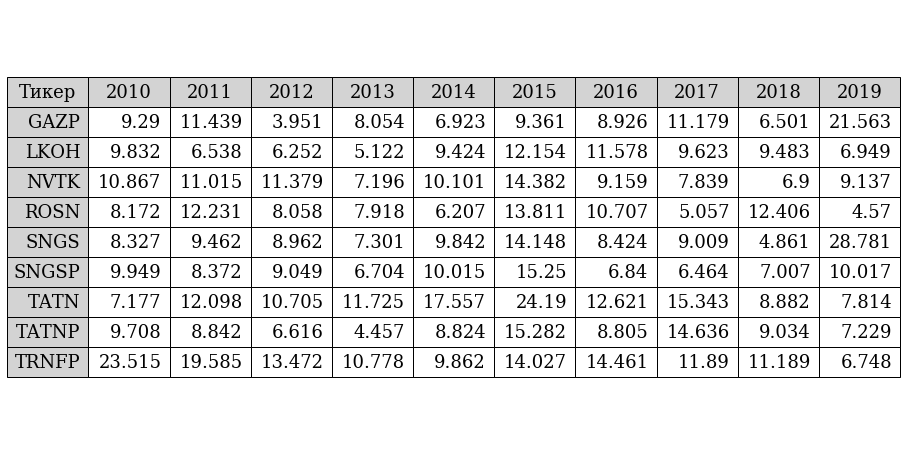

In [13]:
%%time
dfRP
# оформление таблицы
fig1,ax1 = plt.subplots(figsize=(8,8))
ax1.axis('tight')
ax1.axis('off')
colo = ['white']*10
colo.insert(0,'lightgrey')
cellcolo = [colo]*9
the_table1=ax1.table(cellText=dfRP.values,colLabels=dfRP.columns,loc='center',colColours=['lightgrey']*11,cellColours=cellcolo)
the_table1.auto_set_font_size('best')
the_table1.scale(2,2.5)
the_table1.set_fontsize(30)
rcParams['font.family']='serif'
rcParams['font.sans-serif']=['Times']
# сохранение в pdf
pp1=PdfPages(myDataPath+'Таблица 3. Максимальные недельные скачки цен вверх.pdf')
pp1.savefig(fig1,bbox_inches='tight')
pp1.close()

Wall time: 12.4 s


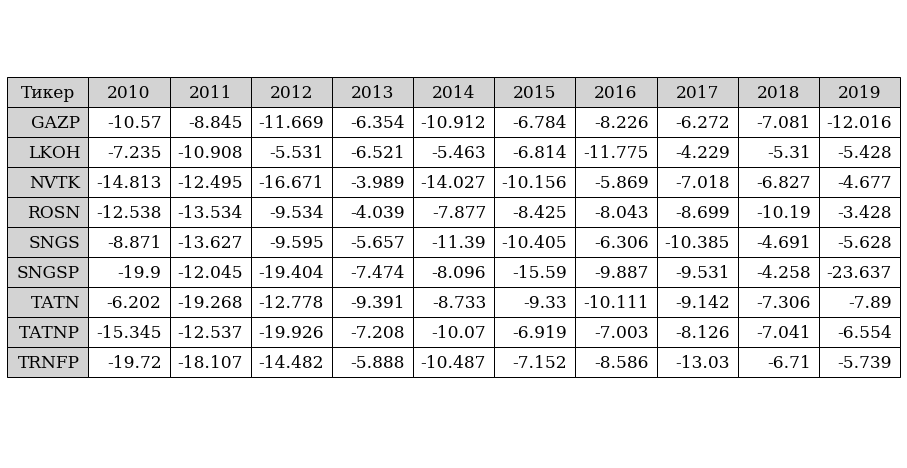

In [14]:
%%time
dfDP
# оформление таблицы
fig1,ax1 = plt.subplots(figsize=(8,8))
ax1.axis('tight')
ax1.axis('off')
colo = ['white']*10
colo.insert(0,'lightgrey')
cellcolo = [colo]*9
the_table1=ax1.table(cellText=dfDP.values,colLabels=dfDP.columns,loc='center',colColours=['lightgrey']*11,cellColours=cellcolo)
the_table1.auto_set_font_size('best')
the_table1.scale(2,2.5)
the_table1.set_fontsize(30)
rcParams['font.family']='serif'
rcParams['font.sans-serif']=['Times']
# сохранение в pdf
pp1=PdfPages(myDataPath+'Таблица 4. Максимальные недельные скачки цен вниз.pdf')
pp1.savefig(fig1,bbox_inches='tight')
pp1.close()

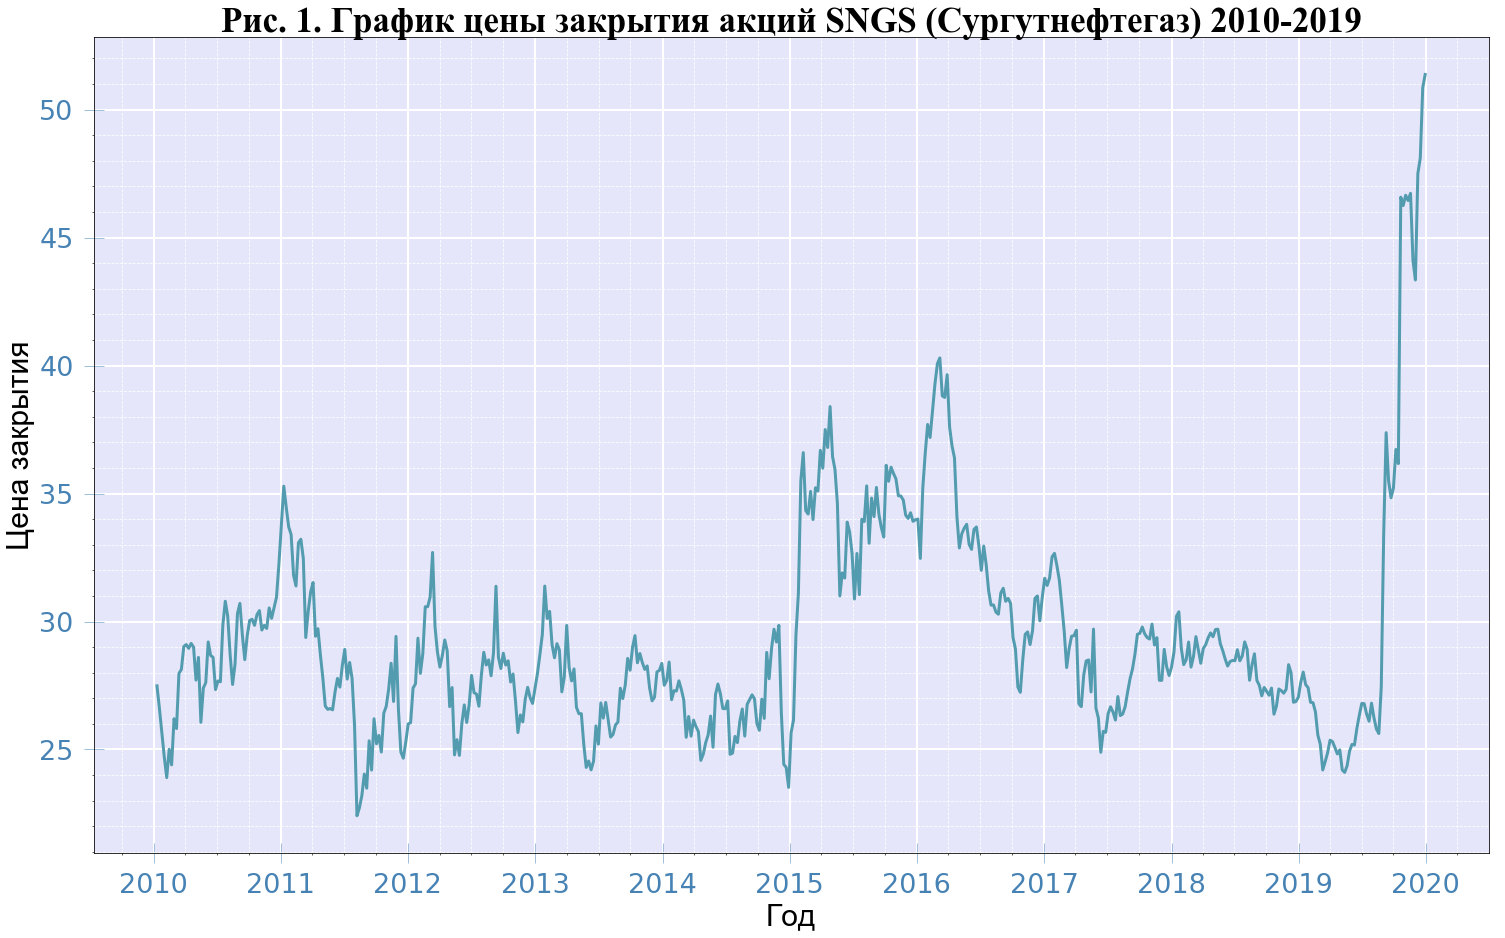

Wall time: 2.16 s


In [7]:
%%time
# подготовка библиотек
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
# загрузка данных о котировках SNGS
sngs = pd.read_csv('D:\\files\\SNGS.csv')
# удаление ненужных столбцов
cols = ['<TIME>','<PER>','<OPEN>','<HIGH>','<LOW>','<VOL>']
for col in cols:
    sngs = sngs.drop('{}'.format(col), axis=1)
# работа над датами
date = []
for i in range(len(sngs['<DATE>'])):
    year = str(sngs['<DATE>'][i])[:4]
    month = str(sngs['<DATE>'][i])[4:6]
    day = str(sngs['<DATE>'][i])[6:]
    date.append(year + '-' + month + '-' + day)
date = pd.to_datetime(date)
date = pd.DataFrame(date)
sngs['<DATE>'] = date
plot1 = plt.plot(sngs['<DATE>'],sngs['<CLOSE>'], lw = 3, color = '#539caf', alpha = 1)
#оформление
plt.tick_params(direction = 'inout',    #  Рисуем деления внутри и снаружи графика
               length = 20,    #  длинна делений
               width = 0.5,     #  ширина делений
               color = 'steelblue',    #  цвет делений
               pad = 10,    #  расстояние между черточкой и ее подписью
               labelsize = 27,    #  размер подписи
               labelcolor = 'steelblue',    #  цвет подписи
               bottom = True,    #  рисуем метки снизу
               left = True,    #  слева
               labelbottom = True,    #  рисуем подписи снизу
               labelleft = True,    #  слева
               labelrotation = 0)    #  Поворот подписей
plt.grid(which='major',color = 'white',linewidth = 2, linestyle = '-')
plt.minorticks_on()# видимость вспомогательных делений
plt.grid(which='minor',color = 'white',linestyle = '--')


plt.title('Рис. 1. График цены закрытия акций SNGS (Сургутнефтегаз) 2010-2019',
          {'fontname':'Times New Roman'},fontsize=35, ha='center')
plt.ylabel('Цена закрытия',{'fontname':'Arial'},fontsize=30, ha='center')
plt.xlabel('Год',{'fontname':'Arial'},fontsize=30, ha='center')
plt.savefig(myDataPath+ "Рис. 1. График цены закрытия SNGS.png")
plt.show()

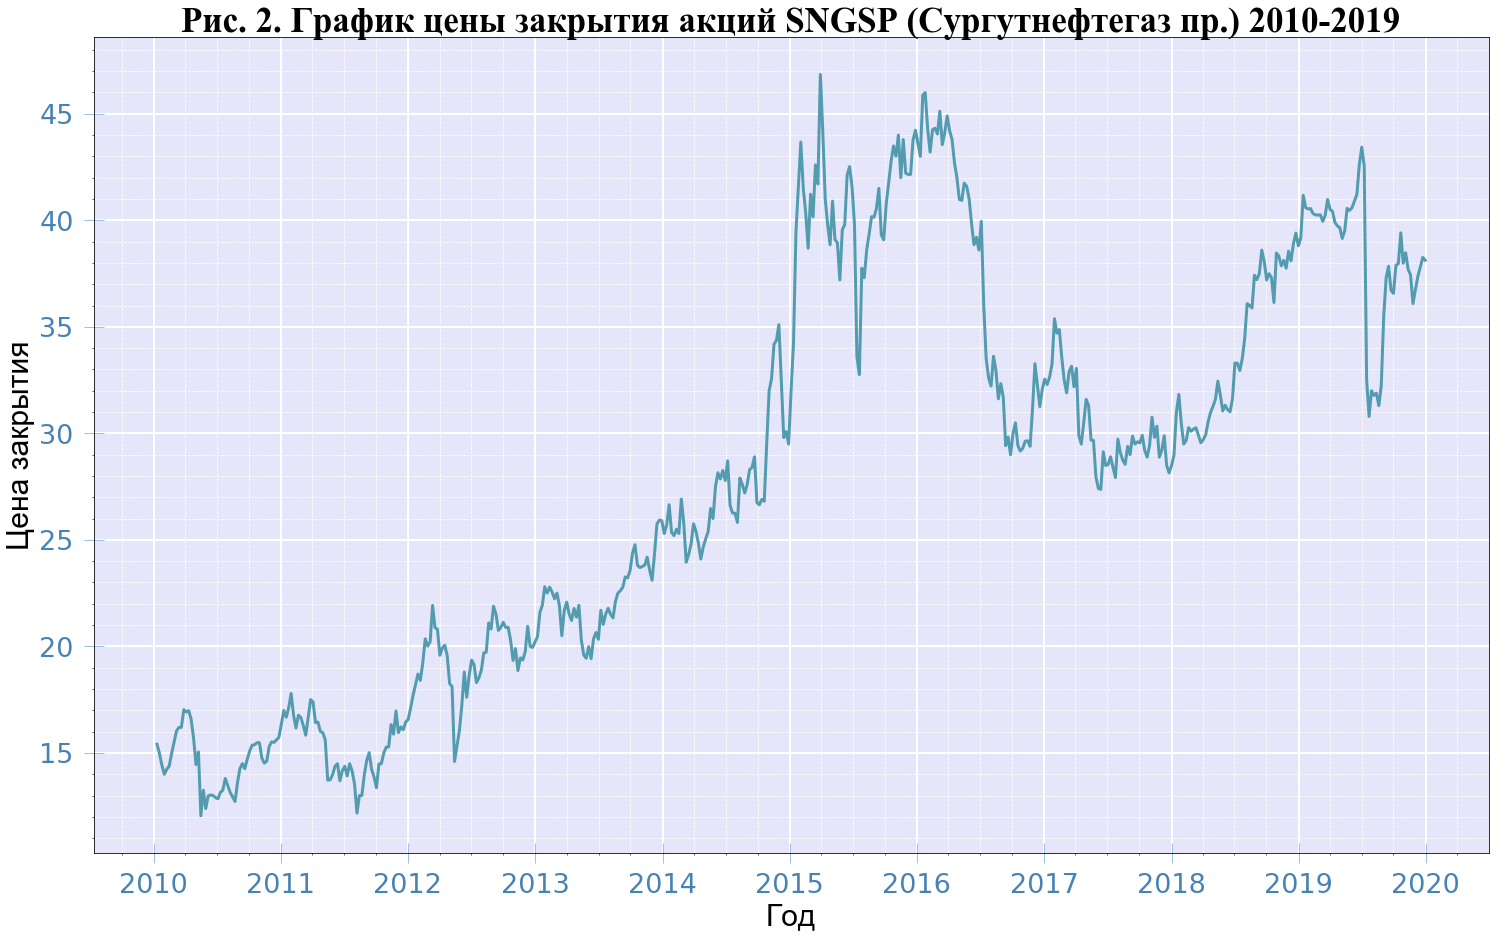

Wall time: 2.36 s


In [8]:
%%time
# подготовка библиотек
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
# загрузка данных о котировках SNGSP
sngsp = pd.read_csv('D:\\files\\SNGSP.csv')
# удаление ненужных столбцов
cols = ['<TIME>','<PER>','<OPEN>','<HIGH>','<LOW>','<VOL>']
for col in cols:
    sngsp = sngsp.drop('{}'.format(col), axis=1)
# работа над датами
date = []
for i in range(len(sngsp['<DATE>'])):
    year = str(sngsp['<DATE>'][i])[:4]
    month = str(sngsp['<DATE>'][i])[4:6]
    day = str(sngsp['<DATE>'][i])[6:]
    date.append(year + '-' + month + '-' + day)
date = pd.to_datetime(date)
date = pd.DataFrame(date)
sngsp['<DATE>'] = date
plot1 = plt.plot(sngsp['<DATE>'],sngsp['<CLOSE>'], lw = 3, color = '#539caf', alpha = 1)
#оформление
plt.tick_params(direction = 'inout',    #  Рисуем деления внутри и снаружи графика
               length = 20,    #  длинна делений
               width = 0.5,     #  ширина делений
               color = 'steelblue',    #  цвет делений
               pad = 10,    #  расстояние между черточкой и ее подписью
               labelsize = 27,    #  размер подписи
               labelcolor = 'steelblue',    #  цвет подписи
               bottom = True,    #  рисуем метки снизу
               left = True,    #  слева
               labelbottom = True,    #  рисуем подписи снизу
               labelleft = True,    #  слева
               labelrotation = 0)    #  Поворот подписей
plt.grid(which='major',color = 'white',linewidth = 2, linestyle = '-')
plt.minorticks_on()# видимость вспомогательных делений
plt.grid(which='minor',color = 'white',linestyle = '--')


plt.title('Рис. 2. График цены закрытия акций SNGSP (Сургутнефтегаз пр.) 2010-2019',
          {'fontname':'Times New Roman'},fontsize=35, ha='center')
plt.ylabel('Цена закрытия',{'fontname':'Arial'},fontsize=30, ha='center')
plt.xlabel('Год',{'fontname':'Arial'},fontsize=30, ha='center')
plt.savefig(myDataPath+ "Рис. 2. График цены закрытия SNGSP.png")
plt.show()

# Проверка модельных данных

In [ ]:
# обновление списка тикеров в связи с исключением некоторых данных из исследования
tickers = ['GAZP','LKOH','NVTK','ROSN','SNGSP','TATN','TATNP','TRNFP']

Стандартная ошибка:  0.13871


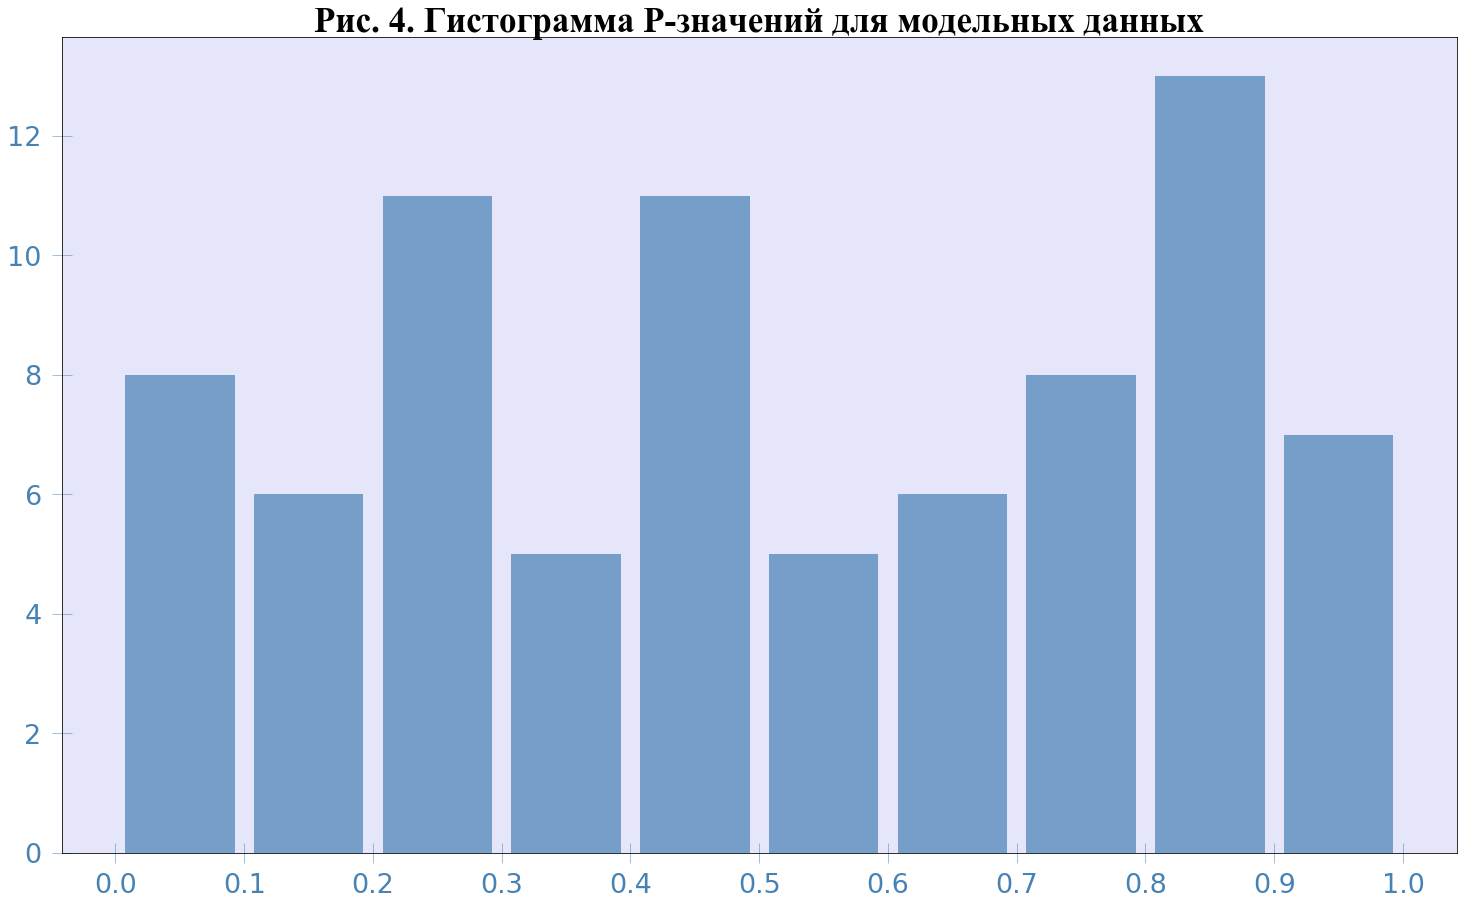

Критерий Колмогорова:  0.89855


In [9]:
import numpy as np
import scipy.stats as st
import random
import time
import pandas as pd
# настройка графиков
plt.rcParams['axes.facecolor'] = 'lavender' 
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.figsize'] = (25,15)

myDataPath = 'D:\\files\\' # расположение файлов
# обновление списка тикеров в связи с исключением некоторых данных из исследования
tickers = ['GAZP','LKOH','NVTK','ROSN','SNGSP','TATN','TATNP','TRNFP']

nvb = 52 # объем выборки для одного года
sta = []
m = []
#вычисление 100000 значений статистики критерия Шапиро-Уилка
for i in range(100000):
    x = np.random.normal(loc=0, scale=1,size = nvb)
    kr = st.shapiro(x)[0]
    m.append(np.mean(x))
    sta.append(kr)

# вычисление стандартной ошибки
std_mis = round((np.var(m))**(1/2),5) 
print('Стандартная ошибка: ',std_mis)

d = pd.DataFrame(sta)
# расчет 999 квантилей
lev1 = np.arange(0.001,1.00,0.001)
z = pd.Series(sta)
lfor_p = []
for i in lev1:
    lfor_p.append(z.quantile(i))
df_q1 = pd.DataFrame({'quantiles':lev1, 'value':lfor_p})
df_q1.to_csv(myDataPath+"999quantiles_n=52.csv",decimal=',',index=True, sep=';', encoding='cp1251') 
# расчет 9 квантилей
lev2 = np.arange(0.1,1.00,0.1)
df_q2 =  pd.DataFrame([round(z.quantile(i),5) for i in lev2], index=lev2, columns=['quantiles'])

def p_value(qq):
    x = np.random.normal(loc = 0, scale = 1,size=qq)
    # вычисление статистики критерия Шапиро-Уилка
    u = st.shapiro(x)[0]
    k = 0
    for i in range(len(lfor_p)):
        if u > lfor_p[i]: k+=1
    return round(k/len(lev1),3)

# создание дф P-value
df_pv = pd.DataFrame()
pv = []
# расчет P-value и заполнение дф 
df_pv['Тикер'] = tickers
for i in range(2010,2020):
    s = []
    for ticker in tickers:
        b = p_value(nvb)
        s.append(b)
        pv.append(b)
    df_pv[str(i)] = s
df_pv.to_csv(myDataPath+"Таблица 6. Р-значения для модельных данных.csv",decimal=',',index=True, sep=';', encoding='cp1251') 

# построение гистограммы
aaa = np.arange(0.0,1.01,0.1)
plt.hist(pv, bins=[i for i in aaa],color = 'steelblue', alpha=0.7, rwidth=0.85)
#оформление
plt.tick_params(direction = 'inout',    #  Рисуем деления внутри и снаружи графика
               length = 20,    #  длинна делений
               width = 0.5,     #  ширина делений
               color = 'steelblue',    #  цвет делений
               pad = 10,    #  расстояние между черточкой и ее подписью
               labelsize = 27,    #  размер подписи
               labelcolor = 'steelblue')    #  цвет подписи
plt.xticks([i for i in aaa])
plt.title('Рис. 4. Гистограмма Р-значений для модельных данных',
          {'fontname':'Times New Roman'},fontsize=35, ha='center')
plt.savefig(myDataPath+ "Рис. 4. Гистограмма Р-значений для модельных данных.png")
plt.show()

from scipy.stats import kstest
## проверка критерием Колмогорова
print('Критерий Колмогорова: ',round(kstest(pv,'uniform')[1],5))

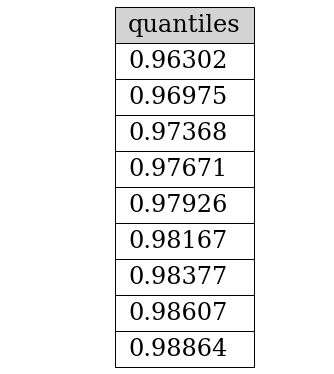

In [20]:
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.ticker as tick
from matplotlib import rcParams
from matplotlib.backends.backend_pdf import PdfPages
# оформление таблицы квантилей
fig,ax = plt.subplots(figsize=(5,1))
ax.axis('tight')
ax.axis('off')
the_table=ax.table(cellText=df_q2.values,colLabels=df_q2.columns,loc='center', cellLoc='left',colColours=['lightgrey', 'lightgrey'])

the_table.auto_set_font_size('best')
the_table.scale(0.5,3)
the_table.set_fontsize(30)
rcParams['font.family']='serif'
rcParams['font.sans-serif']=['Times']
# сохранение файла
pp=PdfPages(myDataPath+'Таблица5.Quantiles.pdf')
pp.savefig(fig,bbox_inches='tight')
pp.close()

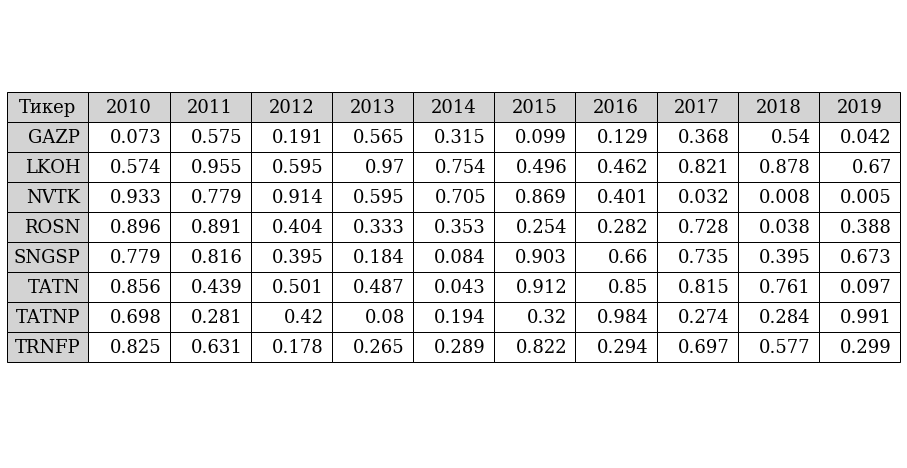

In [21]:
# оформление таблицы P-value
fig1,ax1 = plt.subplots(figsize=(8,8))
ax1.axis('tight')
ax1.axis('off')
colo = ['white']*10
colo.insert(0,'lightgrey')
cellcolo = [colo]*8
the_table1=ax1.table(cellText=df_pv.values,colLabels=df_pv.columns,loc='center',colColours=['lightgrey']*11,cellColours=cellcolo)
the_table1.auto_set_font_size('best')
the_table1.scale(2,2.5)
the_table1.set_fontsize(30)
rcParams['font.family']='serif'
rcParams['font.sans-serif']=['Times']
# сохранение в pdf
pp1=PdfPages(myDataPath+'Таблица6.P-value.pdf')
pp1.savefig(fig1,bbox_inches='tight')
pp1.close()

# Оценка мощности критерия

In [203]:
%%time
import numpy as np
import scipy.stats as st
import pandas as pd
stt_k = []
# формирование 1000 выборок из распределения хи квадрат размера n
for i in range(1000):
    x = st.chi2.rvs(df=2,loc = 0, scale = 1,size = 52)
    stt_k.append(st.shapiro(x)[1])
# вычисление мощности критерия
p = 0
for i in stt_k:
    if i<0.05: p+=1
print(p/1000)

0.999
Wall time: 228 ms


In [208]:
%%time
import numpy as np
import scipy.stats as st
import pandas as pd
stt_k = []
# формирование 1000 выборок из распределения стьюдента размера n
for i in range(1000):
    x = st.t.rvs(df=2,loc = 0, scale = 1,size = 52)
    stt_k.append(st.shapiro(x)[1])
# вычисление мощности критерия
p = 0
for i in stt_k:
    if i<0.05: p+=1
print(p/1000)

0.884
Wall time: 239 ms


In [213]:
%%time
import numpy as np
import scipy.stats as st
import pandas as pd
stt_k = []
# формирование 1000 выборок из распределения пирсона  размера n
for i in range(1000):
    x = st.pearson3.rvs(skew=1,loc = 0, scale = 1,size = 52)
    stt_k.append(st.shapiro(x)[1])
# вычисление мощности критерия
p = 0
for i in stt_k:
    if i<0.05: p+=1
print(p/1000)

0.751
Wall time: 492 ms


# Проверка реальных данных

   Тикер   2010   2011   2012   2013   2014   2015   2016   2017   2018   2019
0   GAZP  0.373  0.417  0.000  0.129  0.243  0.286  0.490  0.033  0.477  0.000
1   LKOH  0.494  0.084  0.968  0.816  0.124  0.004  0.010  0.014  0.651  0.996
2   NVTK  0.001  0.337  0.000  0.005  0.124  0.052  0.777  0.962  0.735  0.038
3   ROSN  0.116  0.668  0.314  0.007  0.786  0.059  0.609  0.015  0.040  0.431
4  SNGSP  0.000  0.361  0.000  0.603  0.083  0.054  0.220  0.452  0.267  0.000
5   TATN  0.035  0.010  0.187  0.670  0.047  0.054  0.237  0.166  0.823  0.674
6  TATNP  0.000  0.052  0.000  0.046  0.279  0.045  0.626  0.294  0.664  0.300
7  TRNFP  0.002  0.053  0.024  0.005  0.401  0.224  0.060  0.000  0.002  0.422


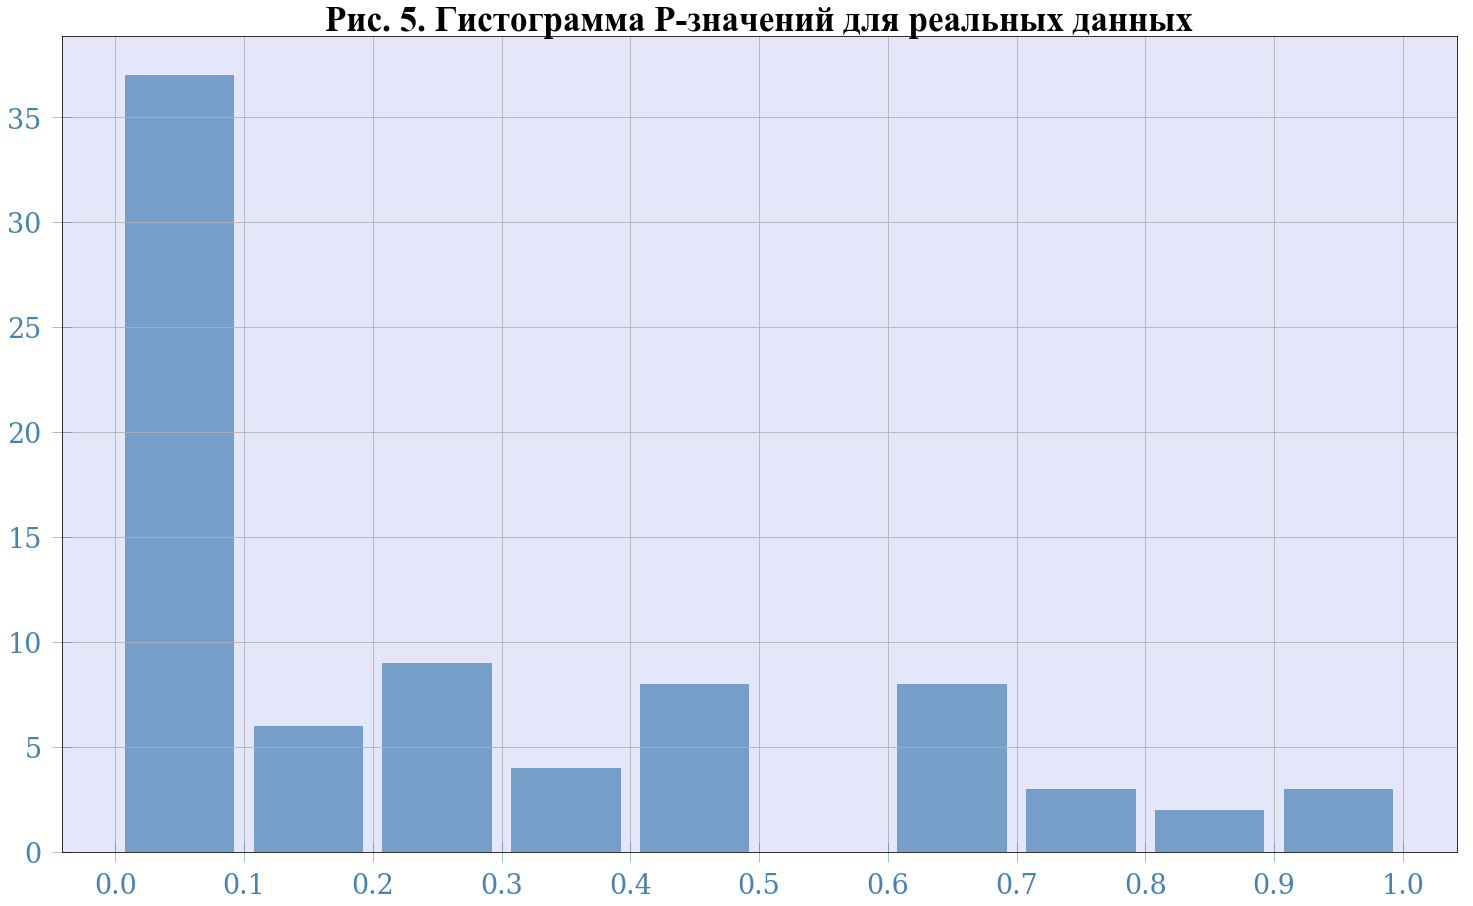

Критерий Колмогорова:  4.296318856233938e-11


In [30]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
myDataPath = 'D:\\files\\' # расположение файлов
# вектор квантилей для расчета p-value
v_qv = pd.read_csv(myDataPath+'999quantiles_n=52.csv',decimal=',', sep=';', encoding='cp1251')
v_qv = list(v_qv['value'])

# функция для расчета p-value
def p_value_real(year,file):
    df = pd.read_csv(myDataPath+file+'.csv')
    condition = (df['<DATE>']>=year*10000) & (df['<DATE>']<(year+1)*10000)# выбор данных year
    df = df[condition]['<CLOSE>']
    df = 100 * pd.DataFrame.diff(np.log(df))[1::]# вычисление лог доходности за выбранный год 
    u = st.shapiro(df)[0] # вычисление статистики
    k = 0
    for i in range(len(v_qv)):
        if u > v_qv[i]: k+=1
    return round(k/len(v_qv),3) # вычисление p-value

tickers = ['GAZP','LKOH','NVTK','ROSN','SNGSP','TATN','TATNP','TRNFP']
# создание дф
df_pv_real = pd.DataFrame()
df_pv_real['Тикер'] = tickers
pv_real = []
# заполнение дф 
for year in range(2010,2020):
    yearp = []
    for ticker in tickers:
        z = p_value_real(year, ticker)
        yearp.append(z)
        pv_real.append(z)
    df_pv_real[str(year)] = yearp
print(df_pv_real)
df_pv_real.to_csv(myDataPath+"Таблица 8. Р-значения для реальных данных.csv",decimal=',',index=True, sep=';', encoding='cp1251') 

# построение гистограммы
aaa = np.arange(0.0,1.01,0.1)
plt.hist(pv_real, bins=[i for i in aaa],color = 'steelblue', alpha=0.7, rwidth=0.85)
#оформление
plt.tick_params(direction = 'inout',    #  Рисуем деления внутри и снаружи графика
               length = 20,    #  длинна делений
               width = 0.5,     #  ширина делений
               color = 'steelblue',    #  цвет делений
               pad = 10,    #  расстояние между черточкой и ее подписью
               labelsize = 27,    #  размер подписи
               labelcolor = 'steelblue')    #  цвет подписи
plt.grid(True)
plt.xticks([i for i in aaa])
plt.title('Рис. 5. Гистограмма Р-значений для реальных данных',
          {'fontname':'Times New Roman'},fontsize=35, ha='center')
plt.savefig(myDataPath+ "Рис. 5. Гистограмма Р-значений для реальных данных.png")
plt.show()

from scipy.stats import kstest
print('Критерий Колмогорова: ',kstest(pv_real,'uniform')[1])

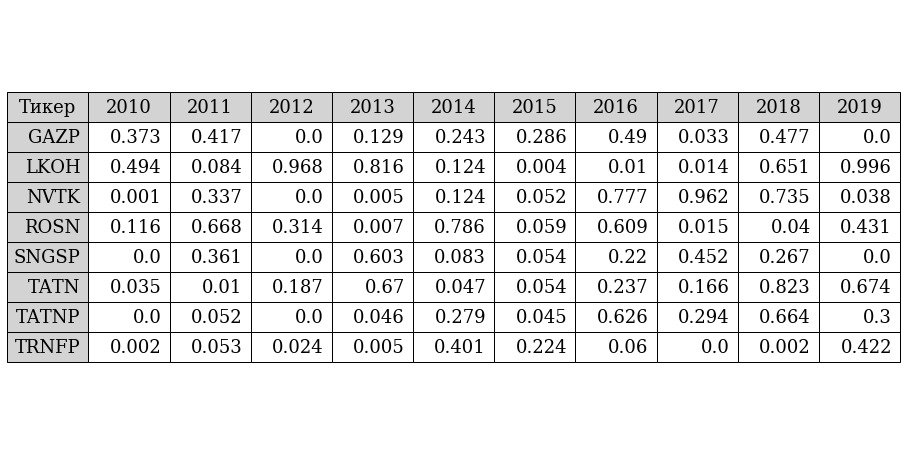

In [26]:
# оформление таблицы P-value
fig1,ax1 = plt.subplots(figsize=(8,8))
ax1.axis('tight')
ax1.axis('off')
colo = ['white']*10
colo.insert(0,'lightgrey')
cellcolo = [colo]*8
the_table1=ax1.table(cellText=df_pv_real.values,colLabels=df_pv_real.columns,loc='center',colColours=['lightgrey']*11,cellColours=cellcolo)
the_table1.auto_set_font_size('best')
the_table1.scale(2,2.5)
the_table1.set_fontsize(30)
rcParams['font.family']='serif'
rcParams['font.sans-serif']=['Times']
# сохранение в pdf
pp1=PdfPages(myDataPath+'Таблица8.P-value_real.pdf')
pp1.savefig(fig1,bbox_inches='tight')
pp1.close()